In [35]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('data_proj4_team6_arena_members.csv')
data.head()

,dt,arena_id,account_db_id,team_id,clan_db_id,prebattle_id,is_prebattle_creator,vehicle_type_cd,life_time_sec,shots,...,mileage_meter,remained_hp,original_credits,original_xp,premium_xp_factor,daily_xp_factor,battle_num,damage_blocked_by_armor,booster_bonus_credits,booster_bonus_xp
0,2017-05-15,aay4c7ddTd2c1ya,yc42T477cd,2,0,0,0,49,382,14,...,1334,-3,125292,1368,15,10,722,240,62646,0
1,2017-05-15,aaddayd7T114224,yc4yyT74aT,2,0,0,0,58641,273,6,...,918,0,10782,112,15,10,301,1500,0,0
2,2017-05-27,2yaddyaycNy22cTcN,yca77dN121,1,0,0,0,49409,213,5,...,653,0,24970,353,15,10,786,780,0,0
3,2017-05-27,2yaddyaycNy22cTcN,ycad7NTc27,1,0,0,0,19729,210,5,...,595,-3,6971,261,15,10,852,300,0,0
4,2017-05-27,2yadd2NNdN4NcdaNN,yc2TT44Nyc,1,0,0,0,1073,152,5,...,758,0,5526,121,15,10,516,0,0,0


In [60]:
%matplotlib inline
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from ipywidgets import interact

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225837 entries, 0 to 1225836
Data columns (total 35 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   dt                        1225837 non-null  datetime64[ns]
 1   arena_id                  1225837 non-null  object        
 2   account_db_id             1225837 non-null  object        
 3   team_id                   1225837 non-null  int64         
 4   clan_db_id                1225837 non-null  int64         
 5   prebattle_id              1225837 non-null  int64         
 6   is_prebattle_creator      1225837 non-null  int64         
 7   vehicle_type_cd           1225837 non-null  int64         
 8   life_time_sec             1225837 non-null  int64         
 9   shots                     1225837 non-null  int64         
 10  hits                      1225837 non-null  int64         
 11  he_hits                   1225837 non-null  int64 

In [3]:
data.isnull().any()

dt                          False
arena_id                    False
account_db_id               False
team_id                     False
clan_db_id                  False
prebattle_id                False
is_prebattle_creator        False
vehicle_type_cd             False
life_time_sec               False
shots                       False
hits                        False
he_hits                     False
pierced                     False
damage_dealt                False
damage_assisted_radio       False
damage_assisted_stun         True
damage_assisted_track       False
damage_received             False
shots_received              False
no_damage_shots_received    False
pierced_received            False
spotted                     False
damaged                     False
kills_made                  False
mileage_meter               False
remained_hp                 False
original_credits            False
original_xp                 False
premium_xp_factor           False
daily_xp_facto

In [10]:
data[data['damage_assisted_stun'].isnull()].iloc[:, :16]

,dt,arena_id,account_db_id,team_id,clan_db_id,prebattle_id,is_prebattle_creator,vehicle_type_cd,life_time_sec,shots,hits,he_hits,pierced,damage_dealt,damage_assisted_radio,damage_assisted_stun
0,2017-05-15,aay4c7ddTd2c1ya,yc42T477cd,2,0,0,0,49,382,14,8,0,4,1584,199,NaN
1,2017-05-15,aaddayd7T114224,yc4yyT74aT,2,0,0,0,58641,273,6,3,0,1,777,0,NaN
2,2017-05-27,2yaddyaycNy22cTcN,yca77dN121,1,0,0,0,49409,213,5,5,0,1,346,216,NaN
3,2017-05-27,2yaddyaycNy22cTcN,ycad7NTc27,1,0,0,0,19729,210,5,5,0,0,0,0,NaN
4,2017-05-27,2yadd2NNdN4NcdaNN,yc2TT44Nyc,1,0,0,0,1073,152,5,1,0,1,148,121,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225832,2017-05-17,c11TaNT4711212T,yc421NyNcy,2,0,0,0,18689,191,9,5,0,4,559,0,NaN
1225833,2017-05-17,c11TaNT4711212T,yc42TTcTcd,2,0,0,0,4657,89,8,1,0,1,81,272,NaN
1225834,2017-05-17,c11TaNT4711212T,yca1y242yT,1,0,0,0,273,225,3,0,2,0,203,0,NaN
1225835,2017-05-17,c11TaNT4711212T,yc42T4aT74,1,0,0,0,1377,225,8,5,0,3,384,0,NaN


In [23]:
data.account_db_id.nunique()

272141

In [37]:
data['dt'] = pd.to_datetime(data['dt'])

In [24]:
data.dt.min()

Timestamp('2017-01-01 00:00:00')

In [23]:
data.dt.max()

Timestamp('2017-12-31 00:00:00')

In [44]:
data['diff'] = data.groupby('account_db_id') \
                        ['dt'] \
                        .transform(lambda x: (x.max()-x.min()).days)

In [49]:
df_corr = data.corr()

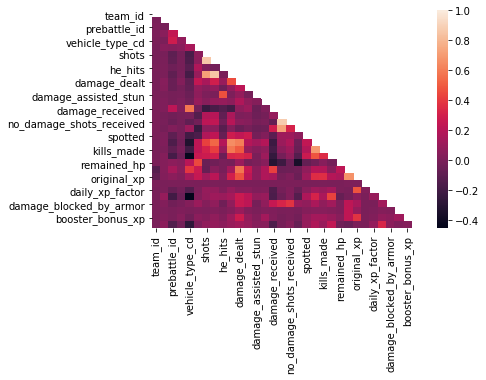

In [53]:
matrix = np.triu(df_corr)
sns.heatmap(df_corr, mask=matrix);

In [51]:
df_corr

,team_id,clan_db_id,prebattle_id,is_prebattle_creator,vehicle_type_cd,life_time_sec,shots,hits,he_hits,pierced,...,remained_hp,original_credits,original_xp,premium_xp_factor,daily_xp_factor,battle_num,damage_blocked_by_armor,booster_bonus_credits,booster_bonus_xp,diff
team_id,1.000000,-0.000218,0.008158,0.008296,0.005850,-0.006217,-0.007430,-0.006369,-0.000951,-0.007349,...,-0.005220,-0.135463,-0.093201,0.001219,-0.008916,-0.007511,-0.000505,-0.000312,-0.003495,-0.004033
clan_db_id,-0.000218,1.000000,-0.016652,0.049658,0.000388,0.038265,-0.007474,-0.000555,0.001790,0.002738,...,0.031468,0.033394,0.024286,-0.000246,0.000791,0.090107,0.026423,0.010151,0.021093,0.054796
prebattle_id,0.008158,-0.016652,1.000000,0.243532,0.282729,0.033499,-0.097960,-0.088711,-0.043815,-0.095878,...,0.062170,0.142455,0.055054,0.001036,-0.068192,-0.201310,-0.029145,0.000370,-0.004502,-0.141270
is_prebattle_creator,0.008296,0.049658,0.243532,1.000000,0.077112,0.047058,-0.021240,-0.012174,-0.016212,-0.007963,...,0.040013,0.049009,0.026736,0.000803,-0.025384,-0.051918,-0.008559,0.015388,0.038177,-0.024974
vehicle_type_cd,0.005850,0.000388,0.282729,0.077112,1.000000,0.148764,-0.172854,-0.155856,-0.117708,-0.191425,...,0.206125,0.387130,0.146484,0.003321,-0.135393,-0.453985,0.033782,0.000984,-0.028934,-0.277391
life_time_sec,-0.006217,0.038265,0.033499,0.047058,0.148764,1.000000,0.060266,0.058652,0.175889,0.092813,...,0.443749,0.272181,0.254797,0.000116,0.009529,0.023748,0.106304,0.015505,0.055336,0.007680
shots,-0.007430,-0.007474,-0.097960,-0.021240,-0.172854,0.060266,1.000000,0.862234,0.014957,0.719715,...,-0.057647,-0.073021,0.129189,0.001519,0.090026,0.083910,0.029944,0.006203,0.031125,0.072335
hits,-0.006369,-0.000555,-0.088711,-0.012174,-0.155856,0.058652,0.862234,1.000000,-0.026316,0.854865,...,-0.036451,0.043256,0.215449,0.001065,0.080936,0.117717,0.074167,0.019031,0.070863,0.080052
he_hits,-0.000951,0.001790,-0.043815,-0.016212,-0.117708,0.175889,0.014957,-0.026316,1.000000,-0.000948,...,-0.009350,-0.006782,0.026048,-0.000280,0.019310,0.103068,-0.038036,0.003050,0.024454,0.051802
pierced,-0.007349,0.002738,-0.095878,-0.007963,-0.191425,0.092813,0.719715,0.854865,-0.000948,1.000000,...,-0.014982,0.132519,0.296660,0.000671,0.089344,0.145311,0.073459,0.031588,0.108351,0.092005


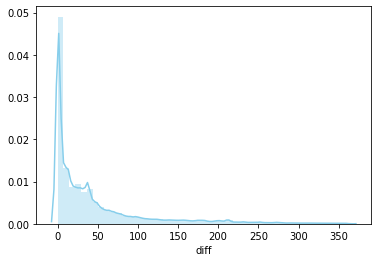

In [58]:
sns.distplot(data["diff"], color="skyblue")

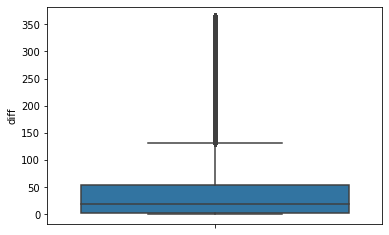

In [59]:
sns.boxplot(y='diff', data=data);